# Predicting Flight Delays: Final Regression Model

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [4]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [5]:
flights = pd.read_csv('../data/data-feature/flights-feature-edit-final.csv')

In [518]:
flights.rename(columns={'fl_date': 'date'}, inplace=True)
flights.head()

,Unnamed: 0,Unnamed: 0.1,date,mkt_unique_carrier,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,route_lq_dep_delay,route_uq_dep_delay,avg_incoming_delay_for_origin,avg_incoming_delay_for_dest,avg_outgoing_delay_for_origin,avg_outgoing_delay_for_dest,num_carr_flts,carr_del,gen_del,op_carr_abs_quality
0,0,0,2018-03-31,UA,UA,N76288,11618,EWR,"Newark, NJ",11697,...,-6.0,15.0,8.726928,2.214038,5.562186,6.711554,25,0.24,6.09375,-5.85375
1,1,1,2019-03-07,UA,UA,N37468,11618,EWR,"Newark, NJ",11697,...,-6.0,15.0,8.726928,2.214038,5.562186,6.711554,25,0.24,6.09375,-5.85375
2,2,2,2018-03-02,UA,UA,N68823,11618,EWR,"Newark, NJ",11697,...,-6.0,15.0,8.726928,2.214038,5.562186,6.711554,25,0.24,6.09375,-5.85375
3,3,3,2019-03-20,UA,UA,N68823,11618,EWR,"Newark, NJ",11697,...,-6.0,15.0,8.726928,2.214038,5.562186,6.711554,25,0.24,6.09375,-5.85375
4,4,4,2019-03-11,UA,UA,N39450,11618,EWR,"Newark, NJ",11697,...,-6.0,15.0,8.726928,2.214038,5.562186,6.711554,25,0.24,6.09375,-5.85375


In [519]:
flights.shape

(980258, 50)

In [16]:
def evaluate_regression(y_test, y_pred):

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return [mae, mse, r2]

## 1. Single Model To Predict Flight Delays

### 1.1 Modelling with Gradient Boosting Regressor 

In [684]:
flights_df1 = flights.copy()

In [685]:
flights_df = flights_df1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'mkt_unique_carrier', 'origin_airport_id', 'origin_city_name',
                           'dest_airport_id', 'dest_city_name', 'dep_delay', 'route', 'total_routes', 'num_delayed_routes'], axis=1)

In [686]:
flights_df = flights_df.drop(['crs_elapsed_time', 'distance', 'month', 'day', 'is_weekend', 'tail_num', 'origin', 'dest',
                               'op_unique_carrier', 'route_median_dep_delay', 'carr_del', 'gen_del'], axis=1)

In [377]:
#flights_df['avg_in_out_delay'] = (flights_df['avg_incoming_delay_for_origin'] + flights_df['avg_incoming_delay_for_dest'] + flights_df['avg_outgoing_delay_for_origin'] + flights_df['avg_outgoing_delay_for_dest'])/4

In [358]:
#flights_df['avg_out_delay'] = (flights_df['avg_outgoing_delay_for_origin'] + flights_df['avg_outgoing_delay_for_dest'])/2

In [391]:
#flights_df.drop(['avg_incoming_delay_for_dest', 'avg_outgoing_delay_for_origin', 'avg_incoming_delay_for_origin', 'avg_outgoing_delay_for_dest'], axis=1, inplace=True)

In [687]:
flights_df.shape

(980258, 26)

In [688]:
X = flights_df.drop('arr_delay', axis=1)
y = flights_df['arr_delay']

In [689]:
X.columns

Index(['month_arr_delay_avg', 'month_dep_delay_avg', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score',
       'orr_busy', 'arr_busy', 'route_mean_delay', 'route_median_delay',
       'route_lq_delay', 'route_uq_delay', 'route_prob_delay',
       'route_mean_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay',
       'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest',
       'avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest',
       'num_carr_flts', 'op_carr_abs_quality'],
      dtype='object')

In [690]:
flights_df.shape

(980258, 26)

In [691]:
dummies = pd.get_dummies(X[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X = pd.concat([X, dummies], axis=1)

In [692]:
X.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [710]:
len(X.columns)

41

In [698]:
X_transformed = X.to_numpy()
y_transformed = y.to_numpy().reshape(-1,1)

In [699]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.25)

In [700]:
gbr = GradientBoostingRegressor()

In [701]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.18087046180941801

In [702]:
y_pred_gbr = gbr.predict(X_test)

In [703]:
gbr_score = evaluate_regression(y_test, y_pred_gbr)

In [704]:
gbr_score

[22.256352430659764, 2031.1730351042168, 0.18087046180941801]

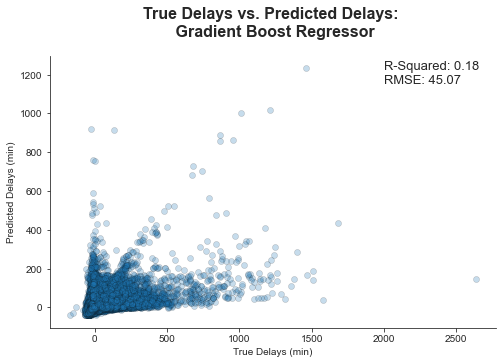

In [705]:
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(x=y_test.reshape(1,-1)[0], y=y_pred_gbr, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Delays vs. Predicted Delays: \n Gradient Boost Regressor',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(gbr_score[2], 2)}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(gbr_score[1]), 2)}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

In [706]:
filename = 'gbr_FINALMODEL.sav'
pickle.dump(gbr, open(filename, 'wb'))

In [617]:
xgb_r1 = xgb.XGBRegressor()

In [618]:
xgb_r1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [619]:
xgb_r1.score(X_test, y_test)

0.16009111644272822

In [621]:
ypredxgbr1 = xgb_r1.predict(X_test)

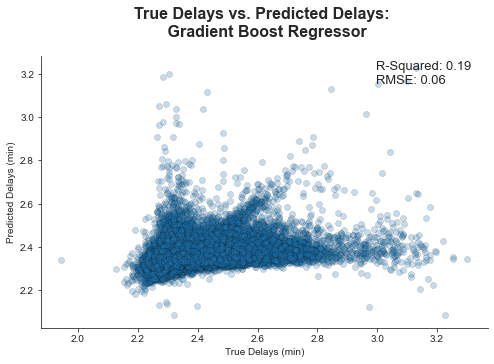

In [622]:
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(x=y_test.reshape(1,-1)[0], y=ypredxgbr1, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Delays vs. Predicted Delays: \n Gradient Boost Regressor',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(gbr_score[2], 2)}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(gbr_score[1]), 2)}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

### 1.2 Hyperparameter Tuning

In [227]:
GBR=GradientBoostingRegressor()
search_dist={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=RandomizedSearchCV(estimator=GBR,param_distributions=search_dist,scoring='r2',n_jobs=1,cv=3)

In [136]:
#search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [500, 1000, 2000],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]},
                   scoring='r2')

In [707]:
#search.best_params_
best_params = {'subsample': 1,
 'random_state': 1,
 'n_estimators': 1000,
 'max_depth': 1,
 'learning_rate': 0.01}

In [709]:
gbr_bestparams = GradientBoostingRegressor(**best_params)
gbr_bestparams.fit(X_train, y_train)
gbr_bestparams.score(X_test, y_test)

0.17989983734473125

In [46]:
#y_pred_gbr_best = gbr_bestparams.predict(X_test)

In [440]:
gbr_r_score = evaluate_regression(y_test, y_pred_gbr_best)

In [444]:
np.sqrt(gbr_r_score[1])

45.812872933377626

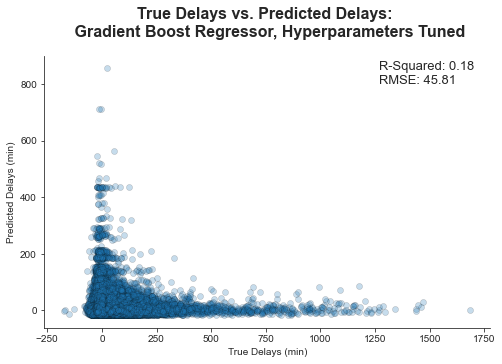

In [544]:
fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(x=y_test.reshape(1,-1)[0], y=y_pred_gbr_best, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Delays vs. Predicted Delays: \n Gradient Boost Regressor, Hyperparameters Tuned',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(gbr_r_score[2], 2)}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(gbr_r_score[1]), 2)}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

In [445]:
import pickle
filename = 'gb_flightdelay_onemodel2.sav'
pickle.dump(gbr_bestparams, open(filename, 'wb'))

In [446]:
gbr_bestparams.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.66489674e-02, 0.00000000e+00,
       1.11397155e-02, 0.00000000e+00, 1.22264387e-04, 9.17524180e-01,
       2.62636226e-03, 3.20099019e-03, 5.42201846e-03, 0.00000000e+00,
       3.30534106e-02, 6.24534010e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.58876663e-04, 0.00000000e+00, 0.00000000e+00, 3.75787435e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [136]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

## 2. Two Models to Predict Extreme Delay and Non-Extreme Delays

### 2.1 Predict Extreme Delays

In [6]:
flights_df2 = flights[['arr_delay', 'month_arr_delay_avg','month_dep_delay_avg', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min',  'plane_score', 'route_mean_delay', 'route_median_delay', 'route_lq_delay',
       'route_uq_delay', 'route_prob_delay', 'route_mean_dep_delay','orr_busy',
       'arr_busy','route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay', 'dep_time_desc', 'arr_time_desc', 
        'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest','avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest']]

In [7]:
extreme_delays = flights_df2[flights_df2['arr_delay'] >= 180]
extreme_delays.shape

(11634, 25)

In [8]:
X_ext = extreme_delays.drop('arr_delay', axis=1)
y_ext = extreme_delays['arr_delay']

In [9]:
dummies = pd.get_dummies(X_ext[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X_ext = pd.concat([X_ext, dummies], axis=1)
X_ext.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [10]:
X_ext_transformed = X_ext.to_numpy()
y_ext_transformed = y_ext.to_numpy().reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_ext_transformed, y_ext_transformed, train_size=0.75)

In [12]:
xgb_r = xgb.XGBRegressor()

In [13]:
xgb_r.fit(X_train, y_train)
xgb_r.score(X_test, y_test)

0.6253530160835785

In [14]:
y_pred_ext_xgb = xgb_r.predict(X_test)

In [17]:
xgb_r_score = evaluate_regression(y_test, y_pred_ext_xgb)

In [18]:
xgb_r_score

[70.02431266944652, 14919.798324053472, 0.6253530160835785]

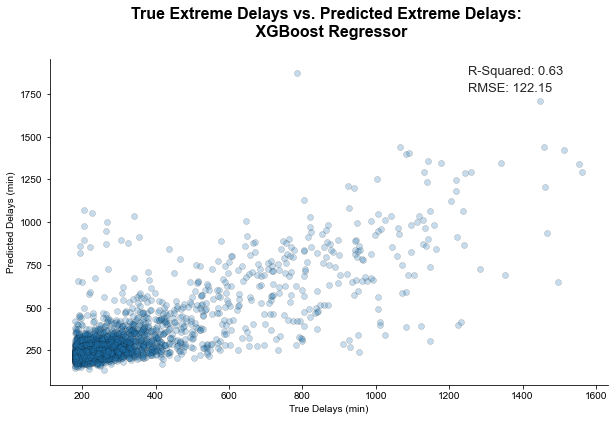

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('ticks')
sns.scatterplot(x=y_test.reshape(1,-1)[0], y=y_pred_ext_xgb, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Extreme Delays vs. Predicted Extreme Delays: \n XGBoost Regressor',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(xgb_r_score[2], 2)}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(xgb_r_score[1]), 2)}', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

In [47]:
#filename = 'xgb_flightdelay_extremedelay.sav'
#pickle.dump(xgb_r, open(filename, 'wb'))

### 2.2 Hyperparameter Tuning for Extreme Delays

### 2.3 Predict Non-Extreme Delays

In [34]:
nonext_delays = flights_df2[(flights_df2['arr_delay'] >= 10) & (flights_df2['arr_delay'] < 180)]
nonext_delays.shape

(216367, 25)

In [35]:
X_nonext = nonext_delays.drop('arr_delay', axis=1)
y_nonext = nonext_delays['arr_delay']

In [36]:
dummies = pd.get_dummies(X_nonext[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X_nonext = pd.concat([X_nonext, dummies], axis=1)

In [37]:
X_nonext.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [38]:
X_nonext_transformed = X_nonext.to_numpy()

In [39]:
y_nonext_transformed = y_nonext.to_numpy().reshape(-1,1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_nonext_transformed, y_nonext_transformed, train_size=0.75)

In [41]:
xgb_r = xgb.XGBRegressor()
xgb_r.fit(X_train, y_train)
xgb_r.score(X_test, y_test)

0.3104979850524804

In [42]:
y_pred_xgb_noext = xgb_r.predict(X_test)

In [43]:
xgb_noext_score = evaluate_regression(y_test, y_pred_xgb_noext)

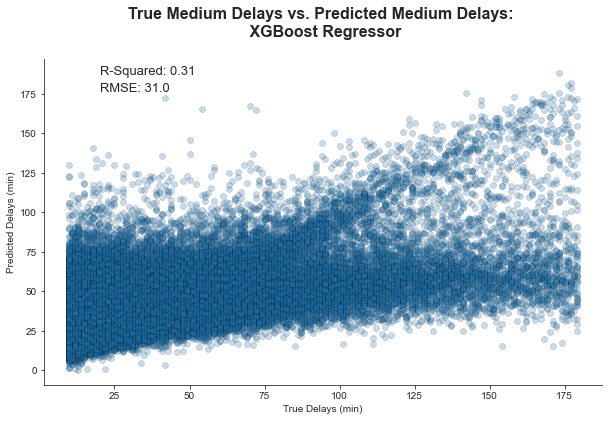

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=y_test.reshape(1,-1)[0], y=y_pred_xgb_noext, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Medium Delays vs. Predicted Medium Delays: \n XGBoost Regressor',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(xgb_noext_score[2], 2)}', xy=(0.1, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(xgb_noext_score[1]), 2)}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

### 2.4 Hyperparameter Tuning for Non-Extreme Delays

## 3. Model Incorporating Weather (Complete Weather Set - 20 Airports)

In [711]:
weather = pd.read_csv('../data/complete_weather_df.csv')
weather.drop(['weather_description', 'Unnamed: 0'], axis=1, inplace=True)

In [712]:
flights_df2 = flights[['date', 'origin', 'dest', 'arr_delay', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score', 'orr_busy',
       'arr_busy', 'route_mean_delay', 'route_median_delay', 'route_lq_delay',
       'route_uq_delay', 'route_prob_delay', 'route_mean_dep_delay',
       'route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay', 'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest',
       'avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest']]

In [713]:
weather_origin = weather.rename(columns={'iata_code': 'origin'})
weather_dest = weather.rename(columns={'iata_code': 'dest'})

In [714]:
flights_df2.shape

(980258, 28)

In [715]:
flights_df2 = pd.merge(flights_df2, weather_origin, on=['date', 'origin'], how='inner')
flights_df2 = pd.merge(flights_df2, weather_dest, on=['date', 'dest'], how='inner')

In [716]:
flights_df2 = flights_df2.drop_duplicates()

In [717]:
flights_df2.shape

(181800, 40)

In [718]:
flights_df2.columns

Index(['date', 'origin', 'dest', 'arr_delay', 'month_arr_delay_avg',
       'month_dep_delay_avg', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'dep_time_desc', 'arr_time_desc', 'plane_score', 'orr_busy', 'arr_busy',
       'route_mean_delay', 'route_median_delay', 'route_lq_delay',
       'route_uq_delay', 'route_prob_delay', 'route_mean_dep_delay',
       'route_median_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay',
       'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest',
       'avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest',
       'avg_temp_x', 'precip_mm_x', 'humidity_x', 'visibility_x',
       'windspeed_kmhr_x', 'total_snowcm_x', 'avg_temp_y', 'precip_mm_y',
       'humidity_y', 'visibility_y', 'windspeed_kmhr_y', 'total_snowcm_y'],
      dtype='object')

In [719]:
colnames = {'avg_temp_x':'dep_avg_temp', 'precip_mm_x': 'dep_precip', 'humidity_x':'dep_humidity',
           'visibility_x':'dep_visibility', 'windspeed_kmhr_x': 'dep_windspeed', 'total_snowcm_x':'dep_totalsnow',
           'is_extreme_x': 'dep_is_extreme', 'avg_temp_y':'arr_avg_temp', 'precip_mm_y':'arr_precip','humidity_y':'arr_humidity',
           'visibility_y':'arr_visibility', 'windspeed_kmhr_y':'arr_windspeed', 'total_snowcm_y':'arr_totalsnow', 
           'is_extreme_y': 'arr_is_extreme'}

flights_df2.rename(columns=colnames, inplace=True)

In [720]:
flights_df2.drop(['date', 'origin', 'dest'], axis=1, inplace=True)
flights_df2.columns

Index(['arr_delay', 'month_arr_delay_avg', 'month_dep_delay_avg', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'dep_time_desc', 'arr_time_desc',
       'plane_score', 'orr_busy', 'arr_busy', 'route_mean_delay',
       'route_median_delay', 'route_lq_delay', 'route_uq_delay',
       'route_prob_delay', 'route_mean_dep_delay', 'route_median_dep_delay',
       'route_lq_dep_delay', 'route_uq_dep_delay',
       'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest',
       'avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest',
       'dep_avg_temp', 'dep_precip', 'dep_humidity', 'dep_visibility',
       'dep_windspeed', 'dep_totalsnow', 'arr_avg_temp', 'arr_precip',
       'arr_humidity', 'arr_visibility', 'arr_windspeed', 'arr_totalsnow'],
      dtype='object')

In [188]:
#flights_df2.drop(['origin', 'dest'], axis=1, inplace=True)

In [721]:
flights_df2.head()

,arr_delay,month_arr_delay_avg,month_dep_delay_avg,dep_hour,dep_min,arr_hour,arr_min,dep_time_desc,arr_time_desc,plane_score,...,dep_humidity,dep_visibility,dep_windspeed,dep_totalsnow,arr_avg_temp,arr_precip,arr_humidity,arr_visibility,arr_windspeed,arr_totalsnow
0,-22.0,-6.0,-2.0,11,33,16,59,noon,evening,-5.0,...,37,10,11,0.0,16,0.0,60,10,19,0.0
1,-14.0,-6.0,-2.0,7,0,12,23,morning,noon,-4.0,...,37,10,11,0.0,16,0.0,60,10,19,0.0
2,-5.0,-6.0,-2.0,15,20,18,14,noon,evening,-9.0,...,81,6,12,0.0,16,0.0,60,10,19,0.0
3,-6.0,-6.0,-2.0,6,55,9,44,morning,morning,-5.0,...,81,6,12,0.0,16,0.0,60,10,19,0.0
4,-16.0,-6.0,-2.0,6,0,8,53,morning,morning,-8.0,...,81,6,12,0.0,16,0.0,60,10,19,0.0


In [722]:
X = flights_df2.drop(['arr_delay'], axis=1)
y = flights_df2[['arr_delay']]

In [723]:
dummies = pd.get_dummies(X[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X = pd.concat([X, dummies], axis=1)

In [724]:
X.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [725]:
X_transformed = X.to_numpy()
y_transformed = y.to_numpy().reshape(-1,1)

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, train_size=0.75)

In [727]:
xgb_rw = xgb.XGBRegressor()
xgb_rw.fit(X_train, y_train)
xgb_rw.score(X_test, y_test)

0.09546576544679508

In [728]:
gbr_w = GradientBoostingRegressor()
gbr_w.fit(X_train, y_train)
gbr_w.score(X_test, y_test)

0.11629951800364147

In [729]:
y_pred_gbr_w = gbr_w.predict(X_test)

In [731]:
gbr_w_score = evaluate_regression(y_test, y_pred_gbr_w)

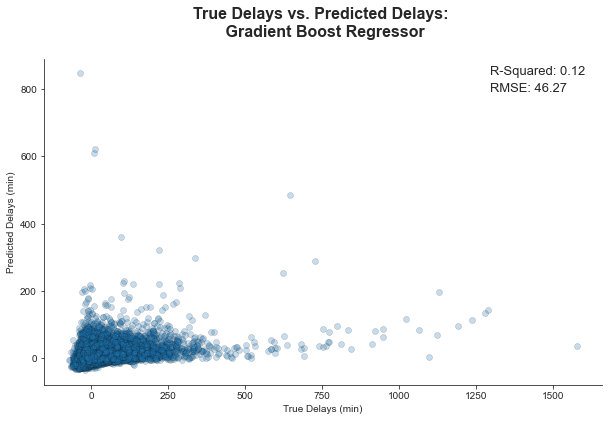

In [735]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=y_test.reshape(1,-1)[0], y=y_pred_gbr_w, alpha=0.25, edgecolor='.05')
ax.set(xlabel='True Delays (min)', ylabel='Predicted Delays (min)')
ax.set_title(f'True Delays vs. Predicted Delays: \n Gradient Boost Regressor',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, x =0.5, y=1.05)
plt.annotate(f'R-Squared: {round(gbr_w_score[2], 2)}', xy=(0.8, 0.95), xycoords='axes fraction', fontsize=13)
plt.annotate(f'RMSE: {round(np.sqrt(gbr_w_score[1]), 2)}', xy=(0.8, 0.9), xycoords='axes fraction', fontsize=13)
sns.despine()
plt.show()

## 4. Model Incorporating Weather (Incomplete Weather Set - 9 Airports)

In [219]:
weather = pd.read_csv('../data/data-feature/flights_weather_feature_engineering.csv')
weather.drop('Unnamed: 0', axis=1, inplace=True)

In [220]:
weather.columns

Index(['date', 'origin', 'dest', 'dep_delay', 'arr_delay', 'dep_avg_temp',
       'dep_precip_mm', 'dep_humidity', 'dep_visibility', 'dep_total_snowcm',
       'dep_windspeed', 'dep_weather_description', 'arr_avg_temp',
       'arr_precip_mm', 'arr_humidity', 'arr_visibility', 'arr_total_snowcm',
       'arr_windspeed', 'arr_weather_description', 'dep_thunder', 'dep_cloudy',
       'dep_snow', 'dep_rainy', 'arr_thunder', 'arr_cloudy', 'arr_snow',
       'arr_rainy', 'arr_snow_bin', 'dep_snow_bin', 'arr_precip_bin',
       'dep_precip_bin', 'dep_humidity_bin', 'arr_humidity_bin',
       'dep_avgtemp_bin', 'arr_avgtemp_bin'],
      dtype='object')

In [228]:
arrival = weather.drop(['origin', 'arr_delay', 'dep_delay', 'dep_avg_temp', 'dep_precip_mm', 'dep_humidity',
             'dep_visibility', 'dep_total_snowcm', 'dep_windspeed', 'dep_weather_description',
             'dep_thunder', 'dep_cloudy', 'dep_snow', 'dep_rainy', 'dep_precip_bin', 'dep_humidity_bin', 
              'dep_snow_bin', 'dep_avgtemp_bin'], axis=1)
origin = weather.drop(['dest', 'arr_delay', 'arr_delay', 'arr_avg_temp', 'arr_precip_mm', 'arr_humidity',
             'arr_visibility', 'arr_total_snowcm', 'arr_windspeed', 'arr_weather_description',
             'arr_thunder', 'arr_cloudy', 'arr_snow', 'arr_rainy', 'arr_precip_bin', 'arr_humidity_bin', 
              'arr_snow_bin', 'arr_avgtemp_bin'], axis=1)

In [229]:
origin.columns

Index(['date', 'origin', 'dep_delay', 'dep_avg_temp', 'dep_precip_mm',
       'dep_humidity', 'dep_visibility', 'dep_total_snowcm', 'dep_windspeed',
       'dep_weather_description', 'dep_thunder', 'dep_cloudy', 'dep_snow',
       'dep_rainy', 'dep_snow_bin', 'dep_precip_bin', 'dep_humidity_bin',
       'dep_avgtemp_bin'],
      dtype='object')

In [230]:
flights_df3 = pd.merge(flights, origin, on=['date', 'origin'], how='inner')

In [232]:
flights_df3 = pd.merge(flights_df3, arrival, on=['date', 'dest'], how='inner')

In [205]:
flights_df3.shape

(102479, 73)